## Introduction





### Import libraries


In [1]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 

%matplotlib inline

### Load Iris Data From CSV File  



In [2]:
import pandas as pd
cust_df = pd.read_csv(r"C:\Users\jator\OneDrive\ESSEX UNIVERSITY MASTERS DATA SCIENCE\module 4\Unit06 iris.csv")
cust_df.head

<bound method NDFrame.head of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

### Pre-processing

As you can see, species in this dataset is a categorical variable. k-means algorithm isn't directly applicable to categorical variables because Euclidean distance function isn't really meaningful for discrete variables. So, lets drop this feature and run clustering.

In [3]:
df = cust_df.drop('species', axis=1)
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


we will normilize the data

In [4]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 1.03205722e+00, -1.34127240e+00, -1.31297673e+00],
       [-1.24957601e-01, -1.34127240e+00, -1.31297673e+00],
       [ 3.37848329e-01, -1.39813811e+00, -1.31297673e+00],
       [ 1.06445364e-01, -1.28440670e+00, -1.31297673e+00],
       [ 1.26346019e+00, -1.34127240e+00, -1.31297673e+00],
       [ 1.95766909e+00, -1.17067529e+00, -1.05003079e+00],
       [ 8.00654259e-01, -1.34127240e+00, -1.18150376e+00],
       [ 8.00654259e-01, -1.28440670e+00, -1.31297673e+00],
       [-3.56360566e-01, -1.34127240e+00, -1.31297673e+00],
       [ 1.06445364e-01, -1.28440670e+00, -1.44444970e+00],
       [ 1.49486315e+00, -1.28440670e+00, -1.31297673e+00],
       [ 8.00654259e-01, -1.22754100e+00, -1.31297673e+00],
       [-1.24957601e-01, -1.34127240e+00, -1.44444970e+00],
       [-1.24957601e-01, -1.51186952e+00, -1.44444970e+00],
       [ 2.18907205e+00, -1.45500381e+00, -1.31297673e+00],
       [ 3.11468391e+00, -1.28440670e+00, -1.05003079e+00],
       [ 1.95766909e+00, -1.39813811e+00

### Applying K means

In [5]:
from sklearn.cluster import KMeans
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 2]


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [6]:
df["Clus_km"] = labels
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,Clus_km
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


We can easily check the centroid values by averaging the features in each cluster.

In [7]:
df.groupby('Clus_km').mean()

,sepal_length,sepal_width,petal_length,petal_width
Clus_km,,,,
0,5.915094,2.754717,4.281132,1.350943
1,5.006000,3.418000,1.464000,0.244000
2,6.653191,3.004255,5.610638,2.042553


Now, we will focus on the distribution of sepal lenght and petal widht:

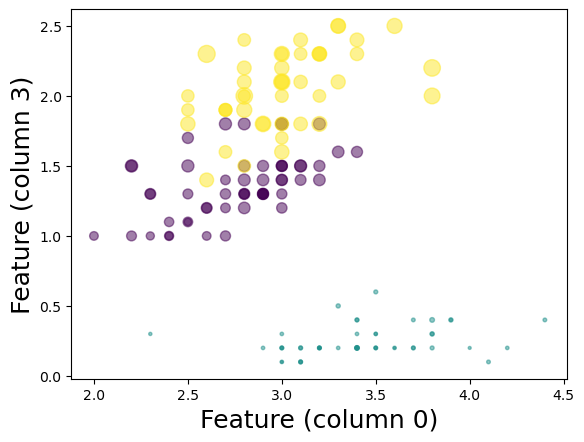

In [8]:
area = np.pi * ( X[:, 1])**2  
# X has shape (n_samples, 3) so valid column indices are 0,1,2.
# use column 2 instead of 3 to avoid IndexError
plt.scatter(X[:, 0], X[:, 2], s=area, c=labels.astype(np.float64), alpha=0.5)
plt.xlabel('Feature (column 0)', fontsize=18)
plt.ylabel('Feature (column 3)', fontsize=18)

plt.show()

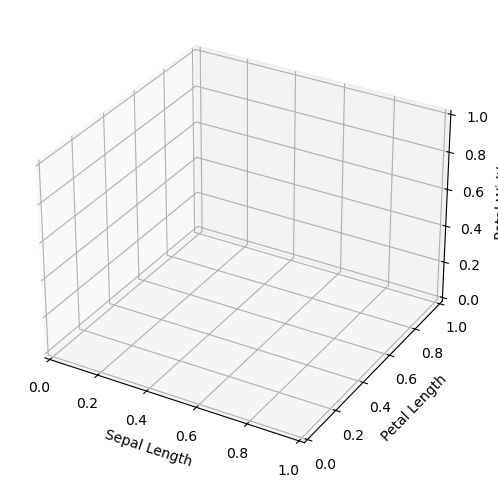

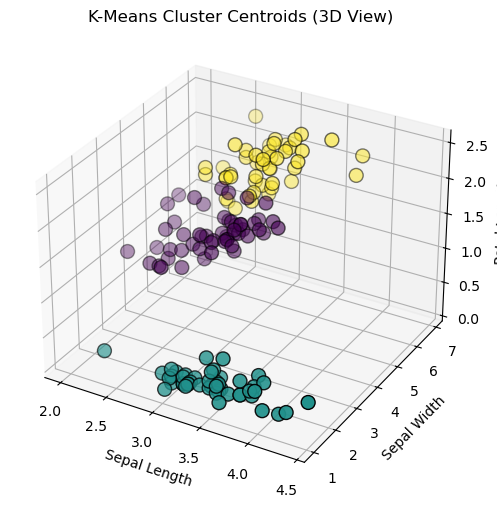

In [9]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Petal Length')
ax.set_zlabel('Petal Width')

# Plot centroids with color-coded labels
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')

# Plot using columns 0, 1, 2
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels.astype(float), s=100, cmap='viridis', edgecolor='k')
plt.title("K-Means Cluster Centroids (3D View)")
plt.show()



#### setting value for k

In [10]:
sse = []
for k in range(1, 4):
    kmeans = KMeans(n_clusters=k, init= "k-means++",n_init= 12,max_iter= 300)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


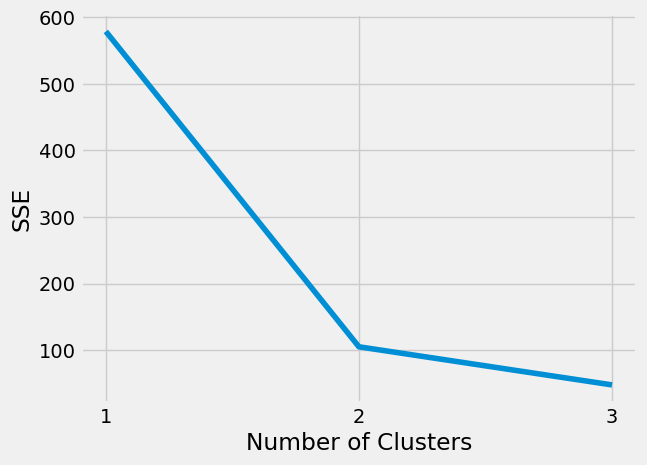

In [11]:
plt.style.use("fivethirtyeight")
# make x match the number of computed SSE values
x = range(1, len(sse) + 1)
plt.plot(x, sse)
plt.xticks(x)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [12]:
from sklearn.metrics import silhouette_score, silhouette_samples

silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, init= "k-means++",n_init= 12,max_iter= 300)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)

silhouette_coefficients

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

[0.7288524281112336,
 0.5929969651467056,
 0.5326977005082739,
 0.4990944682668652,
 0.37313794797636796,
 0.34087905904028226,
 0.3352651385336723,
 0.34013996936043056]

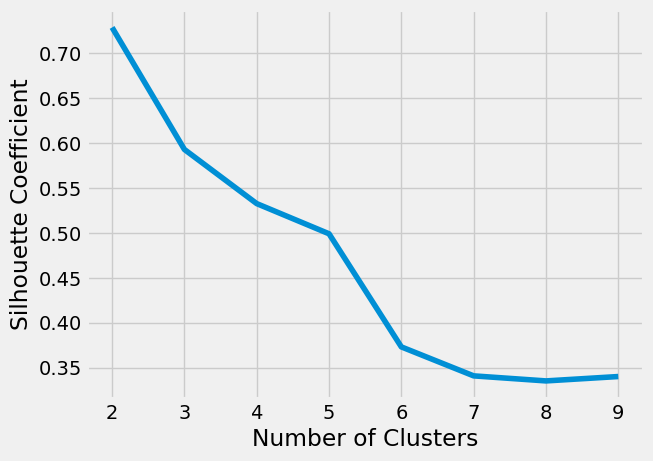

In [13]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 10), silhouette_coefficients)
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()